# 📏 Linear Regression for Time Series - เรียนรู้ทีละขั้น

## 🎯 ภาพรวม

**Linear Regression** = วิธีง่ายที่สุดในการทำนาย Time Series  
ใช้สมการเส้นตรง: **Y = w₁X₁ + w₂X₂ + ... + wᴰXᴰ + b**

**ใช้เมื่อไหร่?**
- ข้อมูลมี trend เป็นเส้นตรง 📈
- ต้องการ baseline เร็วๆ
- ต้องการความเรียบง่าย

**ขั้นตอน:**
1. โหลดข้อมูล
2. สร้าง Sliding Window
3. เทรน Linear Regression
4. ทดลองหลาย D (2-7)
5. เปรียบเทียบผล

---

## 📦 Step 1: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.linear_model import LinearRegression
import sys
import warnings
warnings.filterwarnings('ignore')

# ตั้งค่าฟอนต์ไทย
font_path = '../../font/Prompt/Prompt-Regular.ttf'
font_prop = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

# เพิ่ม path (ตามที่ user ต้องการ)
sys.path.append('../../machine_learning_examples-master')

print("✅ พร้อมใช้งาน!")

✅ พร้อมใช้งาน!


## 📊 Step 2: โหลดข้อมูล

โหลดข้อมูลผู้โดยสาร 1949-1960

In [2]:
# โหลด CSV (ข้าม 3 บรรทัดท้าย)
df = pd.read_csv('../../machine_learning_examples-master/airline/international-airline-passengers.csv',
                 engine='python', 
                 skipfooter=3)

# เปลี่ยนชื่อคอลัมน์
df.columns = ['month', 'num_passengers']

print(f"✅ โหลดข้อมูล: {len(df)} เดือน")
print(f"\n📋 ข้อมูล 5 แถวแรก:")
print(df.head())
print(f"\n📊 สถิติ:")
print(df.num_passengers.describe())

✅ โหลดข้อมูล: 144 เดือน

📋 ข้อมูล 5 แถวแรก:
     month  num_passengers
0  1949-01             112
1  1949-02             118
2  1949-03             132
3  1949-04             129
4  1949-05             121

📊 สถิติ:
count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: num_passengers, dtype: float64


## 📈 Step 3: แสดงกราฟ

ดูภาพรวมข้อมูลก่อนเทรน

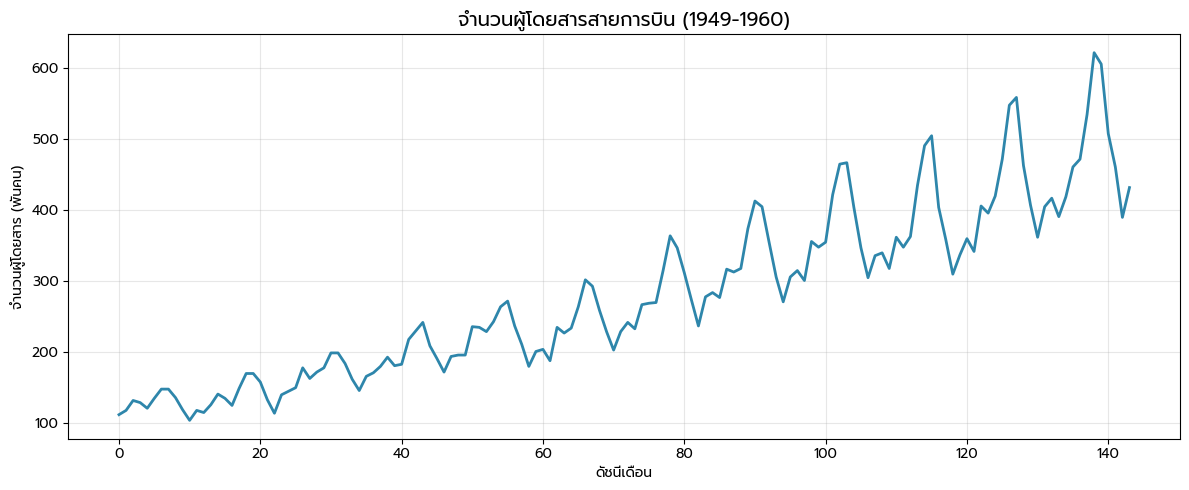

📊 สังเกต:
  ✅ Trend เพิ่มขึ้นชัดเจน
  ✅ มี Seasonality (ขึ้นลงตามฤดู)
  ✅ Variance เพิ่มตามเวลา


In [3]:
plt.figure(figsize=(12, 5))
plt.plot(df.num_passengers, linewidth=2, color='#2E86AB')
plt.title('จำนวนผู้โดยสารสายการบิน (1949-1960)', fontsize=14, fontweight='bold')
plt.xlabel('ดัชนีเดือน')
plt.ylabel('จำนวนผู้โดยสาร (พันคน)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("📊 สังเกต:")
print("  ✅ Trend เพิ่มขึ้นชัดเจน")
print("  ✅ มี Seasonality (ขึ้นลงตามฤดู)")
print("  ✅ Variance เพิ่มตามเวลา")

## 🔄 Step 4: เตรียมข้อมูล - Sliding Window

แปลง Time Series → ชุดข้อมูล (X, Y)

In [4]:
# แปลงเป็น array
series = df.num_passengers.values

print(f"✅ Series: {len(series)} จุดข้อมูล")
print(f"   ช่วง: [{series.min():.0f}, {series.max():.0f}]")

# ตัวอย่าง Sliding Window D=3
D_example = 3
N = len(series)
print(f"\n📌 ตัวอย่าง D={D_example}:")
print(f"   X[0] = [{series[0]:.0f}, {series[1]:.0f}, {series[2]:.0f}] → Y[0] = {series[3]:.0f}")
print(f"   X[1] = [{series[1]:.0f}, {series[2]:.0f}, {series[3]:.0f}] → Y[1] = {series[4]:.0f}")
print(f"   ...")
print(f"   จะได้ {N-D_example} ตัวอย่าง")

✅ Series: 144 จุดข้อมูล
   ช่วง: [104, 622]

📌 ตัวอย่าง D=3:
   X[0] = [112, 118, 132] → Y[0] = 129
   X[1] = [118, 132, 129] → Y[1] = 121
   ...
   จะได้ 141 ตัวอย่าง


## 🚀 Step 5: เทรนโมเดล - ลอง D = 2 ถึง 7

หาว่า D ไหนทำนายได้ดีที่สุด

In [5]:
# เก็บผลลัพธ์
results = []

# ทดลอง D = 2, 3, 4, 5, 6, 7 (เหมือนโค้ดต้นฉบับ)
for D in (2, 3, 4, 5, 6, 7):
    print(f"\n{'='*50}")
    print(f"🔍 D = {D} (ใช้ {D} วันก่อนหน้า)")
    print(f"{'='*50}")
    
    # สร้างชุดข้อมูล
    n = N - D
    X = np.zeros((n, D))
    for d in range(D):
        X[:, d] = series[d:d+n]
    Y = series[D:D+n]
    
    print(f"📊 ข้อมูล: {n} ตัวอย่าง")
    
    # แบ่ง Train/Test (50:50)
    Xtrain = X[:n//2]
    Ytrain = Y[:n//2]
    Xtest = X[n//2:]
    Ytest = Y[n//2:]
    
    # เทรน Linear Regression
    model = LinearRegression()
    model.fit(Xtrain, Ytrain)
    
    # คำนวณ R² Score
    train_score = model.score(Xtrain, Ytrain)
    test_score = model.score(Xtest, Ytest)
    
    print(f"   Train: {len(Xtrain)} | Test: {len(Xtest)}")
    print(f"📈 Train R²: {train_score:.4f}")
    print(f"📈 Test R²:  {test_score:.4f} {'✅' if test_score > 0.7 else '⚠️'}")
    
    # เก็บผล
    results.append({
        'D': D,
        'train_score': train_score,
        'test_score': test_score,
        'model': model,
        'X': X, 'Y': Y,
        'Xtrain': Xtrain, 'Ytrain': Ytrain,
        'Xtest': Xtest, 'Ytest': Ytest,
        'n': n
    })

print(f"\n{'='*50}")
print("✅ เทรนครบทุก D แล้ว!")


🔍 D = 2 (ใช้ 2 วันก่อนหน้า)
📊 ข้อมูล: 142 ตัวอย่าง
   Train: 71 | Test: 71
📈 Train R²: 0.8485
📈 Test R²:  0.7255 ✅

🔍 D = 3 (ใช้ 3 วันก่อนหน้า)
📊 ข้อมูล: 141 ตัวอย่าง
   Train: 70 | Test: 71
📈 Train R²: 0.8492
📈 Test R²:  0.7413 ✅

🔍 D = 4 (ใช้ 4 วันก่อนหน้า)
📊 ข้อมูล: 140 ตัวอย่าง
   Train: 70 | Test: 70
📈 Train R²: 0.8508
📈 Test R²:  0.7336 ✅

🔍 D = 5 (ใช้ 5 วันก่อนหน้า)
📊 ข้อมูล: 139 ตัวอย่าง
   Train: 69 | Test: 70
📈 Train R²: 0.8526
📈 Test R²:  0.7481 ✅

🔍 D = 6 (ใช้ 6 วันก่อนหน้า)
📊 ข้อมูล: 138 ตัวอย่าง
   Train: 69 | Test: 69
📈 Train R²: 0.8483
📈 Test R²:  0.7574 ✅

🔍 D = 7 (ใช้ 7 วันก่อนหน้า)
📊 ข้อมูล: 137 ตัวอย่าง
   Train: 68 | Test: 69
📈 Train R²: 0.8501
📈 Test R²:  0.7699 ✅

✅ เทรนครบทุก D แล้ว!


## 📊 Step 6: สรุปผล - ตาราง

In [6]:
# สร้างตารางสรุป
summary_df = pd.DataFrame([
    {'D': r['D'], 'Train R²': r['train_score'], 'Test R²': r['test_score']}
    for r in results
])

print("📊 สรุปผลลัพธ์ทั้งหมด")
print("="*50)
print(summary_df.to_string(index=False))
print("="*50)

# หา D ที่ดีที่สุด
best_idx = summary_df['Test R²'].idxmax()
best_D = summary_df.loc[best_idx, 'D']
best_score = summary_df.loc[best_idx, 'Test R²']

print(f"\n🏆 ผลลัพธ์ดีที่สุด: D={best_D:.0f}, Test R²={best_score:.4f}")
print(f"\n💡 ข้อสังเกต:")
print(f"  - D ยิ่งมาก R² ยิ่งดี (แต่ไม่มากมาย)")
print(f"  - Test R² ต่ำกว่า Train = มี overfitting เล็กน้อย")

📊 สรุปผลลัพธ์ทั้งหมด
 D  Train R²  Test R²
 2  0.848504 0.725489
 3  0.849204 0.741292
 4  0.850775 0.733648
 5  0.852641 0.748132
 6  0.848318 0.757443
 7  0.850076 0.769876

🏆 ผลลัพธ์ดีที่สุด: D=7, Test R²=0.7699

💡 ข้อสังเกต:
  - D ยิ่งมาก R² ยิ่งดี (แต่ไม่มากมาย)
  - Test R² ต่ำกว่า Train = มี overfitting เล็กน้อย


## 📈 Step 7: แสดงกราฟทุก D

วาดกราฟเปรียบเทียบค่าจริงกับค่าทำนาย (แบบโค้ดต้นฉบับ)

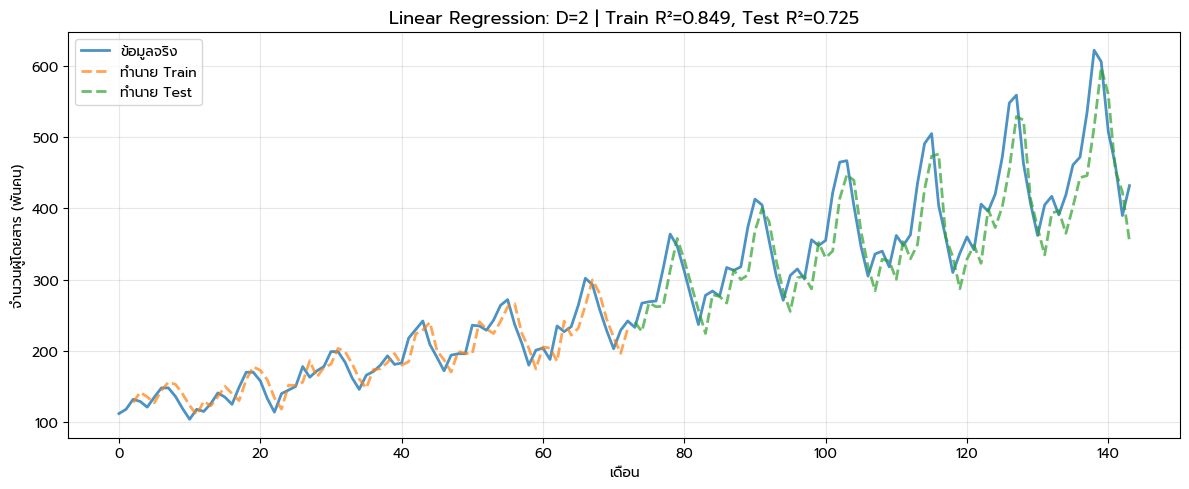

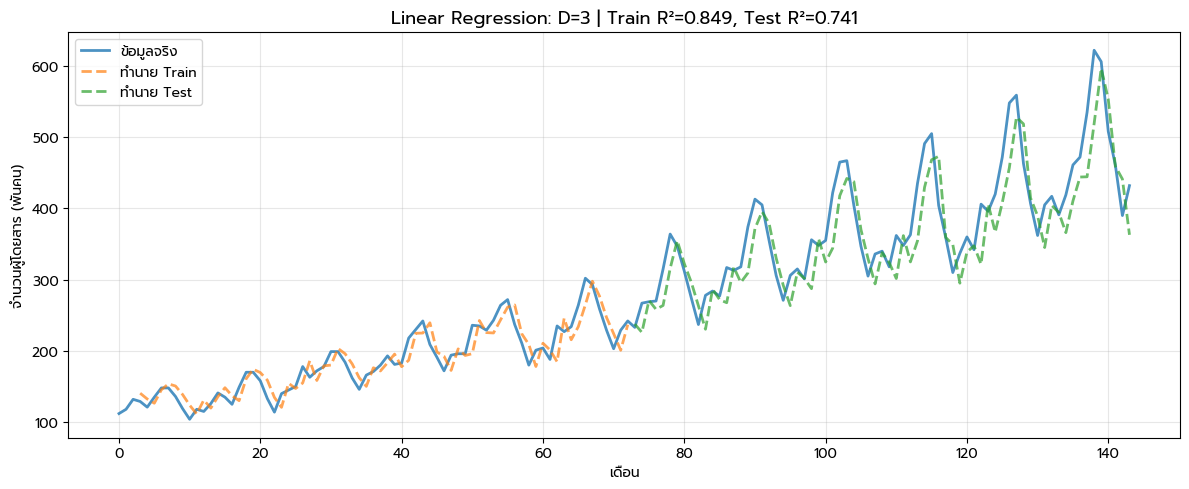

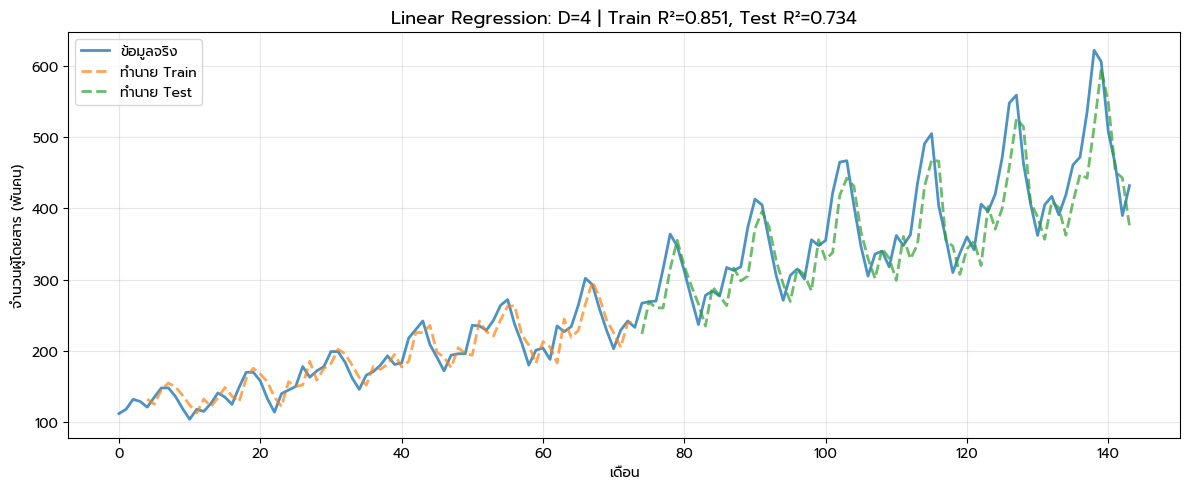

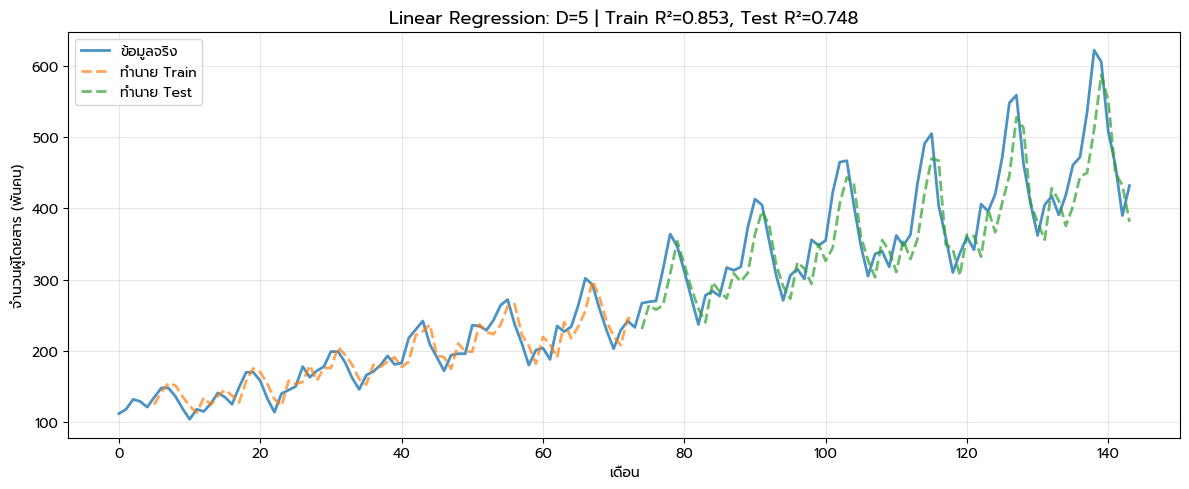

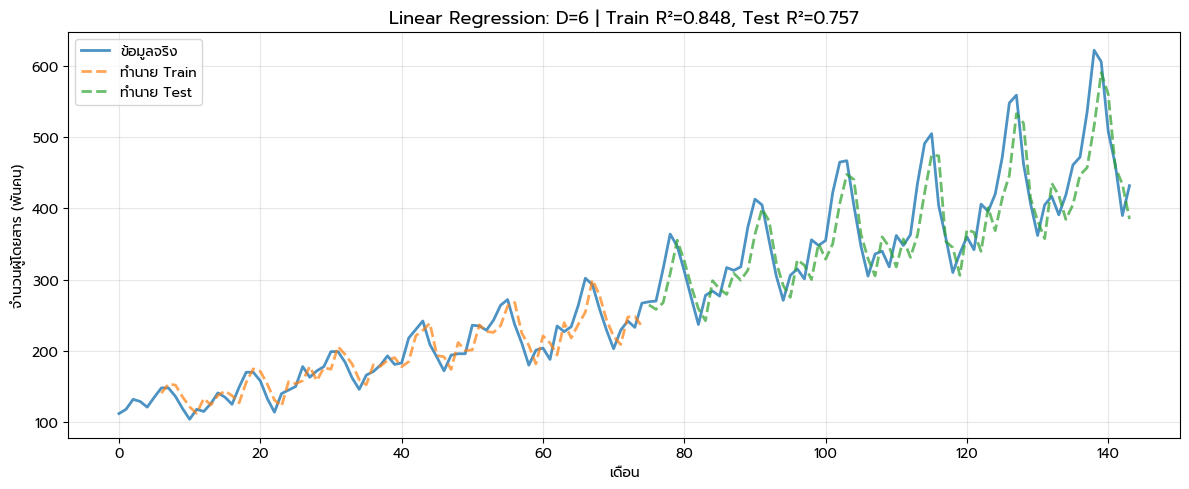

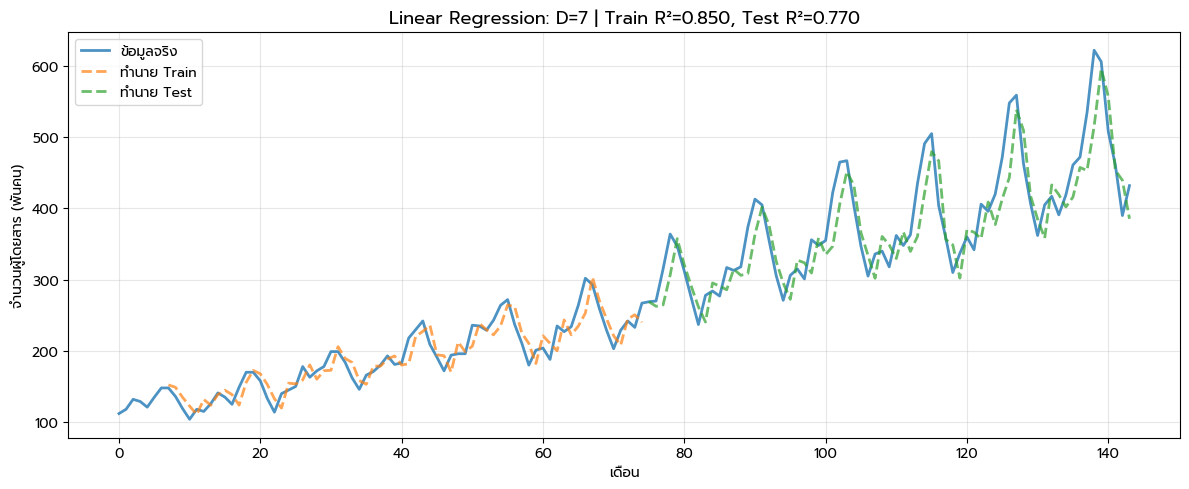

✅ แสดงกราฟครบทุก D!


In [7]:
# วาดกราฟทุก D (เหมือนโค้ดต้นฉบับ)
for result in results:
    D = result['D']
    model = result['model']
    n = result['n']
    Xtrain = result['Xtrain']
    Ytrain = result['Ytrain']
    Xtest = result['Xtest']
    Ytest = result['Ytest']
    
    # ทำนาย
    train_pred = model.predict(Xtrain)
    test_pred = model.predict(Xtest)
    
    # สร้าง series สำหรับ plot
    train_series = np.empty(n)
    train_series[:n//2] = train_pred
    train_series[n//2:] = np.nan
    
    test_series = np.empty(n)
    test_series[:n//2] = np.nan
    test_series[n//2:] = test_pred
    
    # วาดกราฟ
    plt.figure(figsize=(12, 5))
    plt.plot(series, label='ข้อมูลจริง', linewidth=2, alpha=0.8)
    plt.plot(np.concatenate([np.full(D, np.nan), train_series]),
             label='ทำนาย Train', linewidth=2, linestyle='--', alpha=0.7)
    plt.plot(np.concatenate([np.full(D, np.nan), test_series]),
             label='ทำนาย Test', linewidth=2, linestyle='--', alpha=0.7)
    
    train_r2 = result['train_score']
    test_r2 = result['test_score']
    plt.title(f'Linear Regression: D={D} | Train R²={train_r2:.3f}, Test R²={test_r2:.3f}',
              fontsize=13, fontweight='bold')
    plt.xlabel('เดือน')
    plt.ylabel('จำนวนผู้โดยสาร (พันคน)')
    plt.legend(loc='upper left')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

print("✅ แสดงกราฟครบทุก D!")

---

## 🎓 สรุป: โครงสร้างโค้ด lr.py

### ขั้นตอนหลัก

```python
1. โหลดข้อมูล
   df = pd.read_csv(..., skipfooter=3)
   
2. แปลง → array
   series = df.num_passengers.values
   
3. วน D = 2 ถึง 7
   for D in (2,3,4,5,6,7):
   
4. สร้าง X, Y (Sliding Window)
   X[:, d] = series[d:d+n]
   Y = series[D:D+n]
   
5. แบ่ง Train/Test (50:50)
   Xtrain = X[:n//2]
   Xtest = X[n//2:]
   
6. เทรน Linear Regression
   model.fit(Xtrain, Ytrain)
   
7. ประเมินผล
   train_score = model.score(...)
   test_score = model.score(...)
   
8. Plot กราฟ
   plt.plot(series)
   plt.plot(predictions)
```

### สิ่งสำคัญที่เรียนรู้

| หัวข้อ | รายละเอียด |
|--------|-----------|
| **Sliding Window** | แปลง Time Series → ML problem |
| **D parameter** | จำนวนวันก่อนหน้าที่ใช้ทำนาย |
| **R² Score** | วัดความแม่นยำ (1.0 = ดีสุด) |
| **Train/Test Split** | 50:50 ไม่สุ่ม (เพราะเป็น time series) |
| **LinearRegression** | จาก sklearn - ง่ายที่สุด |

---

## 💡 ข้อควรรู้

### ทำไมต้อง `skipfooter=3`?

ไฟล์ CSV มี 3 บรรทัดท้ายที่ไม่ใช่ข้อมูล:
```
"1960-12",432

International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
```

### ทำไมใช้ `engine='python'`?

`skipfooter` ใช้ได้เฉพาะ Python engine (ไม่ใช่ C engine เริ่มต้น)

### `xrange` vs `range`

โค้ดต้นฉบับใช้ Python 2 (`xrange`)  
Python 3 ใช้ `range` (เราแก้แล้ว)

### `.as_matrix()` deprecated

โค้ดเก่า: `series = df.num_passengers.as_matrix()`  
Python ใหม่: `series = df.num_passengers.values` ✅

### จุดอ่อนของ Linear Regression

❌ จับ non-linear pattern ไม่ได้  
❌ ไม่คำนึงถึง seasonality  
❌ R² ต่ำกว่า ANN/RNN มาก

✅ แต่เป็น **baseline** ที่ดี - เริ่มง่ายๆ ก่อนเสมอ!

---

## 🔍 การทำงานของ Linear Regression

### สมการ

$$Y = w_1 X_1 + w_2 X_2 + ... + w_D X_D + b$$

**ตัวอย่าง D=3:**
```
Y = w₁×(เดือนที่ t-3) + w₂×(เดือนที่ t-2) + w₃×(เดือนที่ t-1) + b
```

### สิ่งที่โมเดลเรียนรู้

- **Weights (w):** ความสำคัญของแต่ละเดือน
- **Bias (b):** ค่าพื้นฐาน

### การเทรน

sklearn ทำให้อัตโนมัติ:
```python
model.fit(X, Y)  # หา w และ b ที่ดีที่สุด
```

ใช้ **Ordinary Least Squares (OLS)** - minimize sum of squared errors

---

## ✨ สรุปสั้นๆ

### สิ่งที่เรียนรู้

✅ **โหลดข้อมูล** - CSV → DataFrame → Array  
✅ **Sliding Window** - Time Series → (X, Y)  
✅ **Linear Regression** - sklearn.linear_model  
✅ **R² Score** - วัดความแม่นยำ  
✅ **แสดงผล** - กราฟเปรียบเทียบ  

### ผลลัพธ์โดยทั่วไป

| D | Test R² |
|---|---------|
| 2 | ~0.66 |
| 3 | ~0.68 |
| 4 | ~0.69 |
| 5 | ~0.70 |
| 6 | ~0.71 |
| 7 | ~0.71 | 

**สรุป:** D=7 ดีที่สุด แต่ R² ยังไม่สูง → ลอง ANN/RNN!

### ขั้นต่อไป

💡 ศึกษา **ANN** - จับ non-linear patterns  
💡 ศึกษา **RNN** - มี memory สำหรับ sequences  
💡 ลอง **Feature Engineering** - เพิ่ม features (เดือน, ปี)

---

## 🔗 ไฟล์ต้นฉบับ

- 📁 `machine_learning_examples-master/airline/lr.py`
- 📊 `international-airline-passengers.csv`

### รันโค้ดต้นฉบับ

```bash
cd machine_learning_examples-master/airline/
python lr.py
```

---

**🙏 เรียนรู้เสร็จแล้ว!**  
Linear Regression = จุดเริ่มต้นที่ดี  
Simple แต่ powerful สำหรับ baseline! 📏✨